In [102]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [103]:
import pandas as pd
from pymongo import MongoClient

# Menghubungkan ke server MongoDB (secara lokal)
client = MongoClient('localhost', 27017)
db = client['google_play_store_data']
collection = db['04. label_data_ajaib'] 

# Mengambil semua dokumen dalam koleksi
cursor = collection.find()

# Mengonversi data ke dalam bentuk DataFrame
df = pd.DataFrame(list(cursor))

# Menutup koneksi dengan server MongoDB
client.close()

df


,_id,at,data_clean,label
0,663862c1dd520c9ba22efdc2,2024-05-05 12:11:55,verifikasi jelek,1.0
1,663862c1dd520c9ba22efdc3,2024-05-05 07:32:30,gagal tanda tangan coba ulang foto ktp foto ktp,1.0
2,663862c1dd520c9ba22efdc4,2024-05-05 06:58:43,selesai verifikasi kecewa aplikasi buruk,1.0
3,663862c1dd520c9ba22efdc5,2024-05-04 16:24:09,cocok jual saham,NaN
4,663862c1dd520c9ba22efdc6,2024-05-04 05:10:50,aplikasi ganggu sisa jual saham cocok barusan ...,1.0
...,...,...,...,...
8580,663a4aee22061f845eb78b6c,2021-12-02 17:27:44,maaf tarik dana saldo rdn cba kali salah,NaN
8581,663a4aee22061f845eb78b6d,2021-12-02 16:09:06,bantu nyaman,NaN
8582,663a4aee22061f845eb78b6e,2021-12-02 15:21:33,eroro kakak,NaN
8583,663a4aee22061f845eb78b70,2021-12-02 14:37:57,bantu aplikasi ajaib masuk akun,NaN


In [104]:
# pemisahan data training dan data testing
train_data = df[df["label"].notnull()]  # Data training
val_data = df[df["label"].isnull()]    # Data testing

In [105]:
X = train_data["data_clean"]
y = train_data["label"]

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [108]:
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

MultinomialNB()

In [109]:
# Melakukan prediksi pada set pengujian
y_pred = clf.predict(X_test_counts)

In [110]:
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model Naive Bayes:", accuracy)

Akurasi model Naive Bayes: 0.915


In [111]:
from sklearn.metrics import roc_auc_score

# Prediksi probabilitas pada data pelatihan dan pengujian
y_train_pred_proba = clf.predict_proba(X_train_counts)[:, 1]
y_test_pred_proba = clf.predict_proba(X_test_counts)[:, 1]

# Menghitung ROC AUC score untuk kedua data
roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)

print("ROC AUC score untuk data pelatihan:", roc_auc_train)
print("ROC AUC score untuk data pengujian:", roc_auc_test)


ROC AUC score untuk data pelatihan: 0.9952184810395586
ROC AUC score untuk data pengujian: 0.9857872084876389


In [112]:
# Tampilkan classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.86      0.99      0.92        97
         2.0       0.99      0.84      0.91       103

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200



In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Lakukan cross-validation dengan 5 lipatan
cv_scores = cross_val_score(clf, X_train_counts, y_train, cv=5)

# Tampilkan hasil cross-validation
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.9375  0.89375 0.9     0.89375 0.9    ]
Average accuracy: 0.905


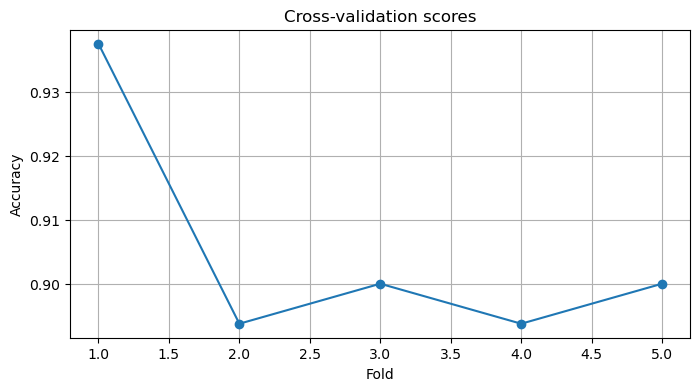

In [114]:
import matplotlib.pyplot as plt
import numpy as np

def plot_crossval_results(cv_scores):
    # Plot akurasi dari setiap lipatan
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-')
    plt.title('Cross-validation scores')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

# Misalkan cv_scores adalah array dari skor cross-validation
# Plot hasil cross-validation
plot_crossval_results(cv_scores)


In [115]:
val_data = df[df["label"].isnull()] 

In [116]:
X_new = val_data["data_clean"]
X_new

3                                        cocok jual saham
5                   tolong baik saham hilang kembali dana
6       ruang email adu jam kerja konfirmasi deposit r...
8                         males aplikasi buka masuk lelah
10      lengkap data ambil foto ktp pencet tanda centa...
                              ...                        
8580             maaf tarik dana saldo rdn cba kali salah
8581                                         bantu nyaman
8582                                          eroro kakak
8583                      bantu aplikasi ajaib masuk akun
8584    mula aplikasi janji mula bantu ayo kode terima...
Name: data_clean, Length: 7585, dtype: object

In [117]:
X_new_counts = vectorizer.transform(X_new)
val_data['predicted_label'] = clf.predict(X_new_counts)

C:\Users\miase\AppData\Local\Temp\ipykernel_16852\3890003558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data['predicted_label'] = clf.predict(X_new_counts)


In [118]:
val_data

,_id,at,data_clean,label,predicted_label
3,663862c1dd520c9ba22efdc5,2024-05-04 16:24:09,cocok jual saham,NaN,2.0
5,663862c1dd520c9ba22efdc7,2024-05-03 23:03:50,tolong baik saham hilang kembali dana,NaN,1.0
6,663862c1dd520c9ba22efdc8,2024-05-03 15:55:27,ruang email adu jam kerja konfirmasi deposit r...,NaN,1.0
8,663862c1dd520c9ba22efdca,2024-05-03 15:14:10,males aplikasi buka masuk lelah,NaN,1.0
10,663862c1dd520c9ba22efdcd,2024-05-01 14:43:10,lengkap data ambil foto ktp pencet tanda centa...,NaN,1.0
...,...,...,...,...,...
8580,663a4aee22061f845eb78b6c,2021-12-02 17:27:44,maaf tarik dana saldo rdn cba kali salah,NaN,1.0
8581,663a4aee22061f845eb78b6d,2021-12-02 16:09:06,bantu nyaman,NaN,2.0
8582,663a4aee22061f845eb78b6e,2021-12-02 15:21:33,eroro kakak,NaN,2.0
8583,663a4aee22061f845eb78b70,2021-12-02 14:37:57,bantu aplikasi ajaib masuk akun,NaN,2.0


In [119]:
# simpan ke file excel baru
val_data.to_excel("hasiltesting.xlsx", index=False)

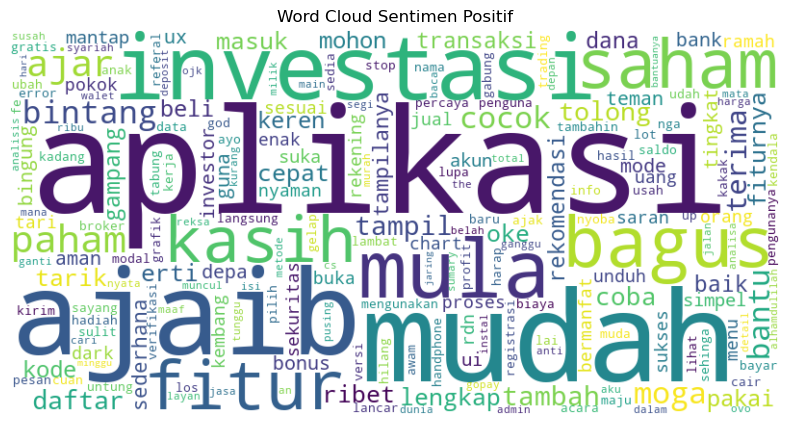

In [120]:
# Load the data for word cloud
wordcloud_data = pd.read_excel("hasiltesting.xlsx")

# Filter the data for label with value "1"
label_data = wordcloud_data[wordcloud_data['predicted_label'] == 2]

# Combine the labels into a single string
labels_text = ' '.join(label_data['data_clean'])

# Split the text into individual words
words = labels_text.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Generate the word cloud with unique words
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Positif')
plt.show()

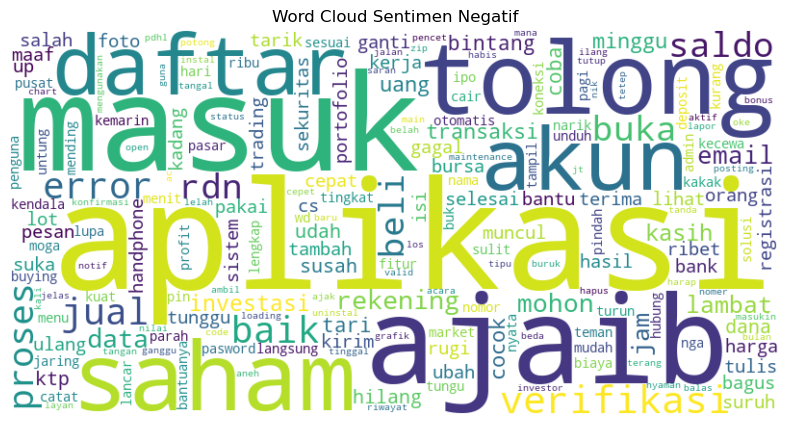

In [121]:
# Load the data for word cloud
wordcloud_data = pd.read_excel("hasiltesting.xlsx")

# Filter the data for label with value "1"
label_data = wordcloud_data[wordcloud_data['predicted_label'] == 1]

# Combine the labels into a single string
labels_text = ' '.join(label_data['data_clean'])

# Split the text into individual words
words = labels_text.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Generate the word cloud with unique words
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Negatif')
plt.show()

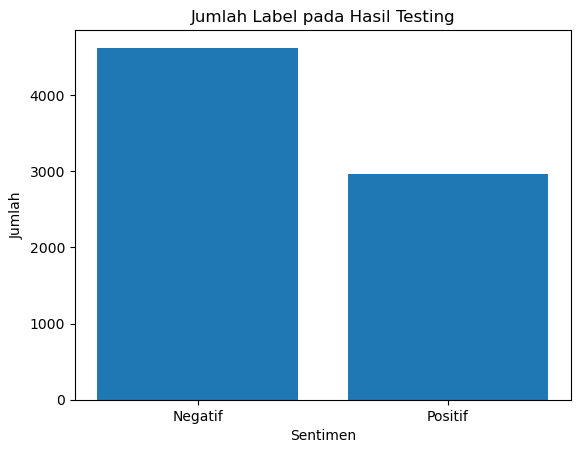

  Sentimen  Jumlah
0  Negatif    4621
1  Positif    2964


In [122]:
# Load the modified testing data
modified_data = pd.read_excel("hasiltesting.xlsx")

# Count the occurrences of each label
label_counts = modified_data["predicted_label"].value_counts()

# Extract the label values and their corresponding counts
labels = label_counts.index.tolist()
counts = label_counts.values.tolist()

# Map the label values to their corresponding sentiment
sentiment_map = {2: "Positif", 1: "Negatif"}
labels = [sentiment_map[label] for label in labels]

# Plot the bar chart
plt.bar(labels, counts)
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.title("Jumlah Label pada Hasil Testing")
plt.show()

chart_data = pd.DataFrame({"Sentimen": labels, "Jumlah": counts})
print(chart_data)

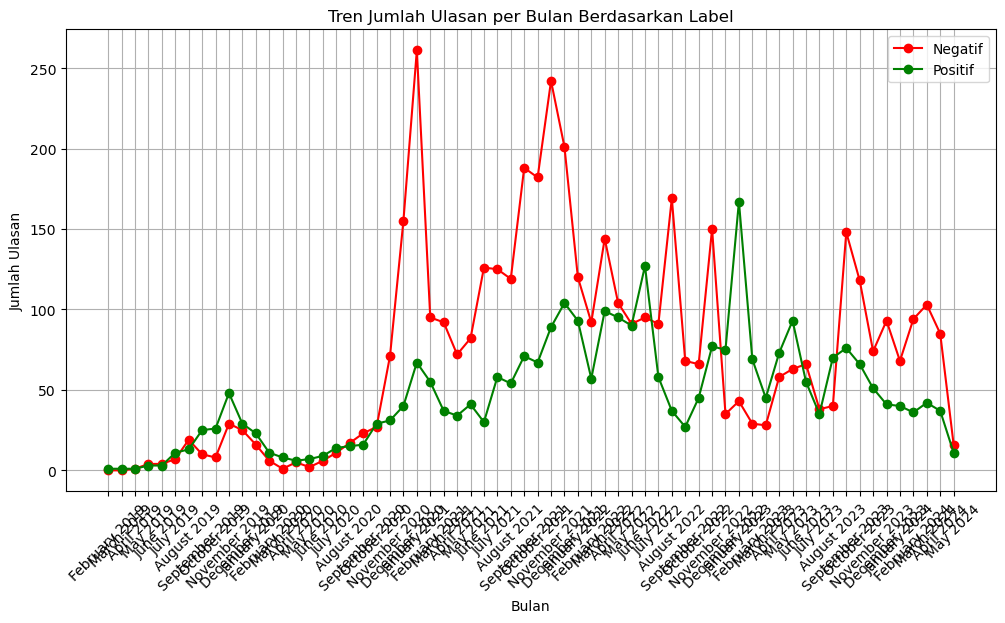

In [123]:
# Memuat data dari Excel file
df = pd.read_excel("hasiltesting.xlsx")

# Mengubah kolom "review_date" menjadi tipe data datetime
df['at'] = pd.to_datetime(df['at'])

# Mengatur kolom "review_date" sebagai indeks dataframe
df.set_index('at', inplace=True)

# Mengganti nilai label menjadi "Positif", "Netral", dan "Negatif"
label_mapping = {2: 'Positif', 1: 'Negatif'}
df['predicted_label'] = df['predicted_label'].map(label_mapping)

# Menghitung jumlah ulasan per bulan berdasarkan label
monthly_reviews = df.groupby([pd.Grouper(freq='M'), 'predicted_label']).size().unstack().fillna(0)

# Membuat line chart untuk tren jumlah ulasan per bulan berdasarkan label
plt.figure(figsize=(12, 6))
labels = ['Negatif', 'Positif']
colors = ['red',  'green']
x_values = range(len(monthly_reviews.index)) 
for i, (label, color) in enumerate(zip(labels, colors)):  # Menambahkan variabel i
    plt.plot(x_values, monthly_reviews[label], marker='o', label=label, color=color)  # Menggunakan x_values

plt.title('Tren Jumlah Ulasan per Bulan Berdasarkan Label')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Ulasan')

# Mengatur sumbu x dengan rentang bulan dan tahun yang sesuai
plt.xticks(x_values, [d.strftime('%B %Y') for d in monthly_reviews.index], rotation=45)  # Menggunakan x_values dan monthly_reviews.index

plt.legend()
plt.grid(True)
plt.show()